In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import os, sys
import numpy as np
import pandas as pd
import joblib
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn import preprocessing

from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error
from sklearn.base import clone
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, precision_score, f1_score, recall_score, accuracy_score

from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.dummy import DummyClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import OneHotEncoder


import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = joblib.load('/dsa/groups/capstonesp2022/on-campus/group_1/data/train_dataset.pkl')
model = joblib.load('/dsa/groups/capstonesp2022/on-campus/group_1/data/model.pkl')

In [3]:
features = ['age', 'gender','alcohol_usage', 'smoke', 'BMI', 'sleep_hour',
            'race_mexican_american', 'race_other_hispanic', 'race_white','race_black', 'race_multi_racial', 'race_asian']
target = 'HBP'

In [4]:
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [5]:
def model_results(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    CM = confusion_matrix(y_test, y_pred)
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    
    # Sensitivity, hit rate, recall, or true positive rate
    TPR = round(TP/(TP+FN),2)
    # Specificity or true negative rate
    TNR = round(TN/(TN+FP),2)
    # Precision or positive predictive value
    PPV = round(TP/(TP+FP),2)
    # Negative predictive value
    NPV = round(TN/(TN+FN),2)
    # Fall out or false positive rate
    FPR = round(FP/(FP+TN),2)
    # False negative rate
    FNR = round(FN/(TP+FN),2)
    
    # AUC
    # predict probabilities
    probs = model.predict_proba(X_test)
    # keep probabilities for the positive outcome only
    probs = probs[:, 1]
    AUC = round(roc_auc_score(y_test, probs),2)
    
    precision = round(precision_score(y_test, y_pred),2)
    recall = round(recall_score(y_test, y_pred),2)
    f1 = round(f1_score(y_test, y_pred),2)
    acc = round(model.best_score_, 2)
    
    print("----Precision : {precision}".format(precision=precision))
    print("----Recall : {recall}".format(recall=recall))
    print("----F1 : {f1}".format(f1=f1))
    print("----Accurancy : {acc}".format(acc=acc))
    print("----TPR : {TPR}".format(TPR=TPR))
    print("----TNR : {TNR}".format(TNR=TNR))
    print("----PPV : {PPV}".format(PPV=PPV))
    print("----NPV : {NPV}".format(NPV=NPV))
    print("----FPR : {FPR}".format(FPR=FPR))
    print("----FNR : {FNR}".format(FNR=FNR))
    print("----AUC : {AUC}".format(AUC=AUC))
    print('\n')
    
    return (model, [TPR, TNR, PPV, NPV, FPR, FNR, precision, recall, f1, acc, AUC])

In [6]:
def calculate_metrics(dataframe, column):
    tmp_df = pd.DataFrame(columns = [column.capitalize(),'FNR','TPR', 'FPR', 'TNR'])
    for value in dataframe[column].unique():
        tmp = dataframe.loc[dataframe[column] == value]
        CM = confusion_matrix(tmp['actual'], tmp['y_predict'])
        TN = CM[0][0]
        FN = CM[1][0]
        TP = CM[1][1]
        FP = CM[0][1]

        # Sensitivity, hit rate, recall, or true positive rate
        TPR = TP/(TP+FN)
        # Specificity or true negative rate
        TNR = TN/(TN+FP) 
        # Precision or positive predictive value
        PPV = TP/(TP+FP)
        # Negative predictive value
        NPV = TN/(TN+FN)
        # Fall out or false positive rate
        FPR = FP/(FP+TN)
        # False negative rate
        FNR = FN/(TP+FN)
        
        tmp_df = tmp_df.append({column.capitalize():value, 'FNR': FNR, 'TPR': TPR, 'FPR':FPR,'TNR':TNR},ignore_index=True)
    return tmp_df

In [7]:
result = model_results(model,X_train, X_test, y_train, y_test)

----Precision : 0.73
----Recall : 0.74
----F1 : 0.73
----Accurancy : 0.8
----TPR : 0.74
----TNR : 0.71
----PPV : 0.73
----NPV : 0.73
----FPR : 0.29
----FNR : 0.26
----AUC : 0.79




In [8]:
y_predict = result[0].predict(X_test)

## Racial Bias

In [9]:
X_train_race = X_train.drop(columns=['race_mexican_american', 'race_other_hispanic', 'race_white','race_black', 'race_multi_racial', 'race_asian'])
X_test_race = X_test.drop(columns=['race_mexican_american', 'race_other_hispanic', 'race_white','race_black', 'race_multi_racial', 'race_asian'])

In [10]:
result_race = model_results(model,X_train_race, X_test_race, y_train, y_test)

----Precision : 0.73
----Recall : 0.74
----F1 : 0.73
----Accurancy : 0.8
----TPR : 0.74
----TNR : 0.71
----PPV : 0.73
----NPV : 0.73
----FPR : 0.29
----FNR : 0.26
----AUC : 0.79




In [11]:
y_predict_race = result_race[0].predict(X_test_race)

In [12]:
tmp_test = X_test.copy()

tmp_test['race'] = None
tmp_test.loc[(tmp_test['race_mexican_american'] == 1) ,'race'] = 'Mexican American'
tmp_test.loc[(tmp_test['race_other_hispanic'] == 1) ,'race'] = 'Other Hispanic'
tmp_test.loc[(tmp_test['race_white'] == 1) ,'race'] = 'White'
tmp_test.loc[(tmp_test['race_black'] == 1) ,'race'] = 'Black'
tmp_test.loc[(tmp_test['race_multi_racial'] == 1) ,'race'] = 'Multi Racial'
tmp_test.loc[(tmp_test['race_asian'] == 1) ,'race'] = 'Asian'

tmp_test['y_predict'] = y_predict
tmp_test['actual'] = y_test

In [13]:
with_race = calculate_metrics(tmp_test, 'race')
with_race

,Race,FNR,TPR,FPR,TNR
0,White,0.282979,0.717021,0.305499,0.694501
1,Mexican American,0.304348,0.695652,0.262376,0.737624
2,Asian,0.412500,0.587500,0.214286,0.785714
3,Other Hispanic,0.262774,0.737226,0.306667,0.693333
4,Multi Racial,0.285714,0.714286,0.208333,0.791667
5,Black,0.138801,0.861199,0.358586,0.641414


In [14]:
tmp_test['y_predict'] = y_predict_race
without_race = calculate_metrics(tmp_test, 'race')
without_race

,Race,FNR,TPR,FPR,TNR
0,White,0.276596,0.723404,0.311609,0.688391
1,Mexican American,0.256039,0.743961,0.316832,0.683168
2,Asian,0.400000,0.600000,0.214286,0.785714
3,Other Hispanic,0.248175,0.751825,0.300000,0.700000
4,Multi Racial,0.303571,0.696429,0.208333,0.791667
5,Black,0.186120,0.813880,0.292929,0.707071


## Gender Bias

In [15]:
tmp_test['y_predict'] = y_predict

tmp_test['gender_map'] = None
tmp_test.loc[(tmp_test['gender'] == 0) ,'gender_map'] = 'Male'
tmp_test.loc[(tmp_test['gender'] == 1) ,'gender_map'] = 'Female'

with_gender = calculate_metrics(tmp_test, 'gender_map')
with_gender = with_gender.rename(columns={'Gender_map':'Gender'})
with_gender

,Gender,FNR,TPR,FPR,TNR
0,Male,0.285290,0.714710,0.288591,0.711409
1,Female,0.223906,0.776094,0.298869,0.701131


In [16]:
X_train_gender = X_train.drop(columns=['gender'])
X_test_gender = X_test.drop(columns=['gender'])

In [17]:
result_gender = model_results(model,X_train_gender, X_test_gender, y_train, y_test)

----Precision : 0.72
----Recall : 0.73
----F1 : 0.73
----Accurancy : 0.8
----TPR : 0.73
----TNR : 0.71
----PPV : 0.72
----NPV : 0.72
----FPR : 0.29
----FNR : 0.27
----AUC : 0.79




In [18]:
y_predict_gender = result_gender[0].predict(X_test_gender)

In [19]:
tmp_test['y_predict'] = y_predict_gender
without_gender = calculate_metrics(tmp_test, 'gender_map')
without_gender = without_gender.rename(columns={'Gender_map':'Gender'})
without_gender

,Gender,FNR,TPR,FPR,TNR
0,Male,0.315007,0.684993,0.270134,0.729866
1,Female,0.208754,0.791246,0.313409,0.686591


## Gender and Race Bias

In [20]:
tmp_test['y_predict'] = y_predict

In [21]:
X_train_race_gender = X_train.drop(columns=['gender', 'race_mexican_american', 'race_other_hispanic', 'race_white','race_black', 'race_multi_racial', 'race_asian'])
X_test_race_gender = X_test.drop(columns=['gender', 'race_mexican_american', 'race_other_hispanic', 'race_white','race_black', 'race_multi_racial', 'race_asian'])

In [22]:
result_race_gender = model_results(model,X_train_race_gender, X_test_race_gender, y_train, y_test)

----Precision : 0.72
----Recall : 0.73
----F1 : 0.73
----Accurancy : 0.79
----TPR : 0.73
----TNR : 0.71
----PPV : 0.72
----NPV : 0.72
----FPR : 0.29
----FNR : 0.27
----AUC : 0.78




In [23]:
y_predict_race_gender = result_race_gender[0].predict(X_test_race_gender)

In [24]:
tmp_test['y_predict'] = y_predict_race_gender
without_gender_race = calculate_metrics(tmp_test, 'gender_map')
without_gender_race = without_gender_race.rename(columns={'Gender_map':'Gender'})
without_gender_race

,Gender,FNR,TPR,FPR,TNR
0,Male,0.316493,0.683507,0.268456,0.731544
1,Female,0.212121,0.787879,0.315024,0.684976


In [25]:
without_race_gender = calculate_metrics(tmp_test, 'race')
without_race_gender

,Race,FNR,TPR,FPR,TNR
0,White,0.282979,0.717021,0.305499,0.694501
1,Mexican American,0.280193,0.719807,0.306931,0.693069
2,Asian,0.437500,0.562500,0.214286,0.785714
3,Other Hispanic,0.248175,0.751825,0.313333,0.686667
4,Multi Racial,0.303571,0.696429,0.208333,0.791667
5,Black,0.195584,0.804416,0.297980,0.702020


## Sumary

In [26]:
race = pd.DataFrame(columns=['metric', 'race', 'type', 'value'])
result = list()

for index in with_race.index:
    data = {}
    for column in with_race.columns:
        if not column == 'Race':
            data['race'] = with_race['Race'][index]
            data['metric'] = column
            data['value'] = with_race[column][index]
            data['type'] = 'With Race'
            result.append(data)
            data = {}

for index in without_race.index:
    data = {}
    for column in without_race.columns:
        if not column == 'Race':
            data['race'] = without_race['Race'][index]
            data['metric'] = column
            data['value'] = without_race[column][index]
            data['type'] = 'Without Race'
            result.append(data)
            data = {}
            
for index in without_race_gender.index:
    data = {}
    for column in without_race_gender.columns:
        if not column == 'Race':
            data['race'] = without_race_gender['Race'][index]
            data['metric'] = column
            data['value'] = without_race_gender[column][index]
            data['type'] = 'Without Race & Gender'
            result.append(data)
            data = {}
            
            
race = race.append(result, ignore_index = True)
race = race[race['metric']=='FNR']

Text(0, 0.5, 'False Negative Rate')

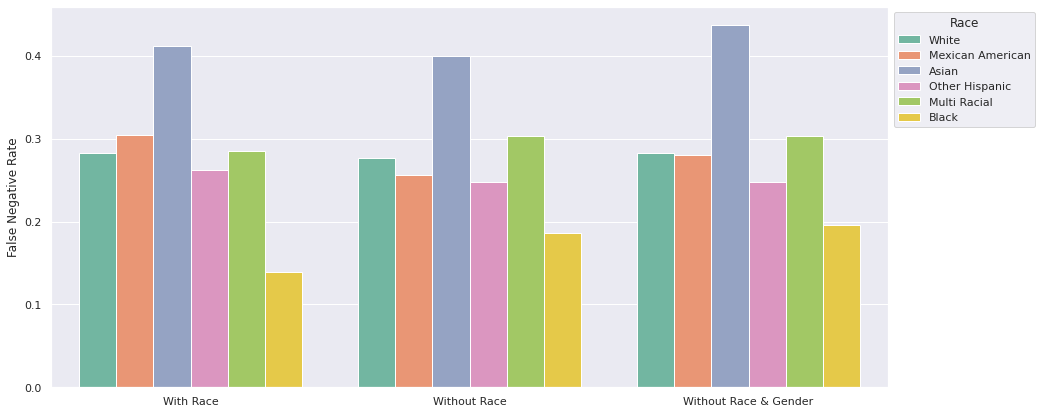

In [27]:
sns.set(color_codes=False)
plt.figure(figsize=(15,7))
ax = sns.barplot(data=race, x='type', y='value',  palette='Set2', hue='race')
ax.set_facecolor('#eaeaf2')
ax.legend(title="Race", loc='upper left',bbox_to_anchor = (1,1))
ax.tick_params(axis='x', rotation=0)
ax.set_xlabel("")
ax.set_ylabel("False Negative Rate")

In [28]:
gender = pd.DataFrame(columns=['metric', 'gender', 'type', 'value'])
result = list()

for index in with_gender.index:
    data = {}
    for column in with_gender.columns:
        if not column == 'Gender':
            data['gender'] = with_gender['Gender'][index]
            data['metric'] = column
            data['value'] = with_gender[column][index]
            data['type'] = 'With Gender'
            result.append(data)
            data = {}

for index in without_gender.index:
    data = {}
    for column in without_gender.columns:
        if not column == 'Gender':
            data['gender'] = without_gender['Gender'][index]
            data['metric'] = column
            data['value'] = without_gender[column][index]
            data['type'] = 'Without Gender'
            result.append(data)
            data = {}
            
for index in without_gender_race.index:
    data = {}
    for column in without_gender_race.columns:
        if not column == 'Gender':
            data['gender'] = without_gender_race['Gender'][index]
            data['metric'] = column
            data['value'] = without_gender_race[column][index]
            data['type'] = 'Without Race & Gender'
            result.append(data)
            data = {}
            
            
gender = gender.append(result, ignore_index = True)
gender = gender[gender['metric']=='FNR']

Text(0, 0.5, 'False Negative Rate')

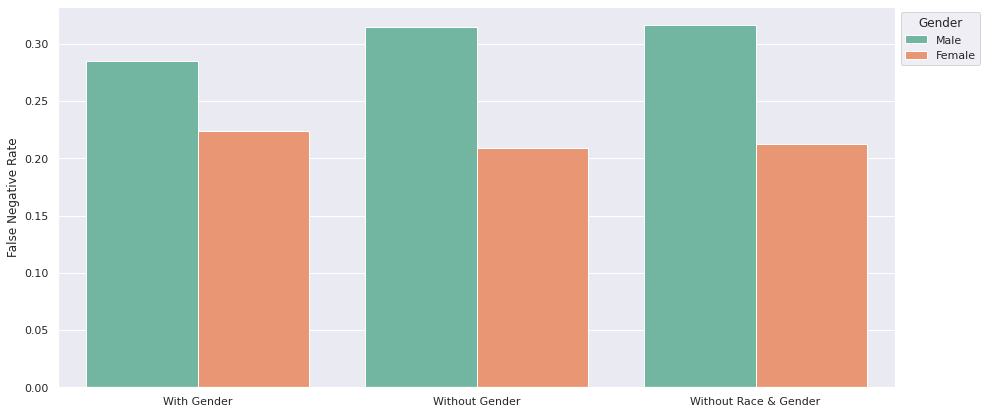

In [29]:
sns.set(color_codes=False)
plt.figure(figsize=(15,7))
ax = sns.barplot(data=gender, x='type', y='value',  palette='Set2', hue='gender')
ax.set_facecolor('#eaeaf2')
ax.legend(title="Gender", loc='upper left',bbox_to_anchor = (1,1))
ax.tick_params(axis='x', rotation=0)
ax.set_xlabel("")
ax.set_ylabel("False Negative Rate")